# 02. TAD Analysis (Insulation Score)

This notebook calculates the insulation score to identify Topologically Associating Domains (TADs).

In [6]:
import cooltools
import bioframe
from cooltools import insulation
import matplotlib.pyplot as plt
import sys
import os

# Add src to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.loaders import load_cooler

## 1. Setup Data and Resources

In [13]:
# Load chromosome sizes for hg38 reference genome
try:
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    print("Loaded hg38 chromsizes")
except Exception as e:
    print(f"Error loading chromsizes: {e}")
    
# Load cooler file
filepath = 'test.mcool'
try:
    c = load_cooler(filepath, resolution=100000)
except FileNotFoundError as e:
    print("File not found. Please ensure data is available.", e)

Loaded hg38 chromsizes


## 2. Calculate Insulation Score

The insulation score is calculated using a sliding window approach. Valleys in the insulation score correspond to TAD boundaries.

In [14]:
if 'c' in locals():
    # Calculate insulation score
    # window_bp is the size of the sliding window (e.g., 500kb)
    # ignore_diags avoids close-range artifacts
    try:
        insulation_table = insulation(
            c, 
            window_bp=[100000, 200000], 
            ignore_diags=2
        )

        print("Insulation Table Head:")
        print(insulation_table.head())
    except Exception as e:
        print(f"Error calculating insulation: {e}")

INFO:root:fallback to serial implementation.


Insulation Table Head:
  chrom   start     end region  is_bad_bin  log2_insulation_score_100000  \
0  chr2       0  100000   chr2       False                           NaN   
1  chr2  100000  200000   chr2       False                           NaN   
2  chr2  200000  300000   chr2       False                           NaN   
3  chr2  300000  400000   chr2       False                           NaN   
4  chr2  400000  500000   chr2       False                           NaN   

   n_valid_pixels_100000  log2_insulation_score_200000  n_valid_pixels_200000  \
0                    0.0                           NaN                    0.0   
1                    0.0                      0.239591                    1.0   
2                    0.0                      0.520176                    1.0   
3                    0.0                     -0.133406                    1.0   
4                    0.0                      0.615189                    1.0   

   boundary_strength_100000  boun

## 3. Visualize Insulation Track (Bonus)

You can plot the `log2_insulation_score_200000` track to see the valleys.

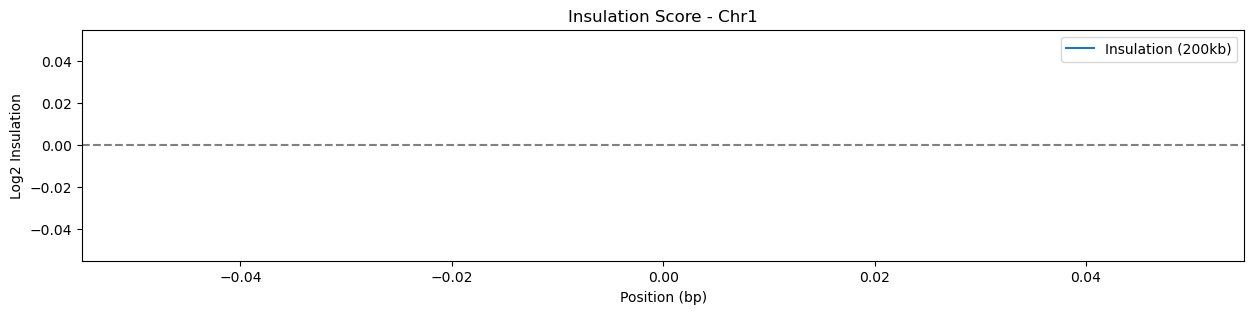

In [15]:
if 'insulation_table' in locals() and not insulation_table.empty:
    plt.figure(figsize=(15, 3))
    # Filter for first chromosome for quick viz
    region = insulation_table[insulation_table['chrom'] == 'chr1']
    plt.plot(region['start'], region['log2_insulation_score_200000'], label='Insulation (200kb)')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("Insulation Score - Chr1")
    plt.xlabel("Position (bp)")
    plt.ylabel("Log2 Insulation")
    plt.legend()
    plt.show()